In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as wb
from pandas_datareader import data as wb
import datetime as dt
from datetime import date
from datetime import datetime
import io
import requests
from pylab import rcParams
import seaborn as sns

plt.style.use("seaborn-dark")



In [123]:
def LinearRegression(x, y):
    n = len(x)
    m_x = x.mean()
    m_y = y.mean()
    SS_xy = (y*x).sum() - n*m_y*m_x 
    SS_xx = (x*x).sum() - n*m_x*m_x
    
    b_1 = (SS_xy)/(SS_xx)
    b_0 = m_y - b_1*m_x
    Line = b_0 + b_1*x
    return(Line)
 

# GOLD Prices

In [10]:
#monthly

gold = pd.read_csv("monthly_csv.csv", sep=",", parse_dates=True)
gold['Date'] = pd.to_datetime(gold['Date'])
gold['year'] = gold['Date'].dt.year
gold.tail(300)

,Date,Price,year
545,1995-06-01,387.618,1995
546,1995-07-01,386.138,1995
547,1995-08-01,383.502,1995
548,1995-09-01,382.931,1995
549,1995-10-01,383.202,1995
...,...,...,...
840,2020-01-01,1560.668,2020
841,2020-02-01,1598.818,2020
842,2020-03-01,1593.764,2020
843,2020-04-01,1680.030,2020


In [92]:
gold.max()

Date     2020-05-01 00:00:00
Price                1780.65
year                    2020
dtype: object

In [11]:
#Annual 

gold_y = pd.read_csv("annual_csv.csv", sep=",", parse_dates=True)
gold_y['Date'] = pd.to_datetime(gold_y['Date'])
gold_y['year'] = gold_y['Date'].dt.year

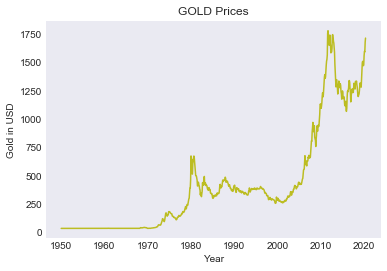

In [12]:


gold_date = gold["Date"]
gold_price = gold["Price"]

GOLD_show = plt.plot(gold_date, gold_price, color = "#bcbd22")

plt.xlabel("Year")
plt.ylabel("Gold in USD")
plt.title('GOLD Prices')

plt.show()


### Gold Miners

In [13]:
tickers = ["AUY", "GOLD", "HMY"]

#AUY = ticker for Yamana Gold Inc.
#GOLD = ticker for Barrick Gold
#HMY = ticker for Harmony Gold Mining Company Limited 
Gold_Miners = pd.DataFrame()                  #creo el dataframe
for t in tickers:                               #itero para extraer de yahoo los valores
    Gold_Miners[t] = wb.DataReader(t, data_source="yahoo", start="1995-01-01")["Adj Close"]

In [18]:
print(Gold_Miners.tail(20))     #stock prices
print(Gold_Miners.shape)          

                 AUY       GOLD    HMY
Date                                  
2020-06-03  5.064399  23.219999  3.110
2020-06-04  5.104276  23.430000  3.250
2020-06-05  5.004583  23.290001  3.130
2020-06-08  5.074368  23.559999  3.170
2020-06-09  5.124215  24.330000  3.220
2020-06-10  5.343540  25.080000  3.360
2020-06-11  4.914860  24.309999  3.080
2020-06-12  4.894921  24.070000  3.140
2020-06-15  4.994615  24.740000  3.120
2020-06-16  4.825137  24.379999  2.990
2020-06-17  4.874983  24.250000  3.020
2020-06-18  4.805198  23.940001  3.030
2020-06-19  5.014553  24.490000  3.280
2020-06-22  5.203969  25.450001  3.460
2020-06-23  5.243847  25.680000  3.590
2020-06-24  5.104276  25.709999  3.430
2020-06-25  5.154123  25.730000  3.650
2020-06-26  5.194000  25.870001  3.600
2020-06-29  5.280000  26.129999  3.970
2020-06-30  5.395000  26.760000  4.115
(4146, 3)


In [33]:
Gold_Miners.dropna()

,AUY,GOLD,HMY
Date,,,
2004-01-12,2.249550,9.378209,15.972221
2004-01-13,2.215465,9.243934,15.679320
2004-01-14,2.053566,8.920838,14.654168
2004-01-15,1.874625,8.627113,14.159900
2004-01-16,1.993918,8.736204,14.507719
...,...,...,...
2020-06-24,5.104276,25.709999,3.430000
2020-06-25,5.154123,25.730000,3.650000
2020-06-26,5.194000,25.870001,3.600000


In [34]:
Gold_Full = gold.merge(Gold_Miners, on="Date", how="inner")

In [35]:
Gold_Full

,Date,Price,year,AUY,GOLD,HMY
0,2004-03-01,405.976,2004,2.104692,8.622911,13.985991
1,2004-04-01,404.850,2004,2.914188,9.990829,14.240525
2,2004-06-01,391.780,2004,2.019482,8.703142,10.602301
3,2004-07-01,398.441,2004,1.763851,8.283249,9.564120
4,2004-09-01,405.402,2004,1.951314,8.588621,11.563664
...,...,...,...,...,...,...
121,2019-08-01,1497.102,2019,3.128975,16.710480,2.630000
122,2019-10-01,1494.765,2019,3.237258,17.010788,2.880000
123,2019-11-01,1471.921,2019,3.563954,16.803339,3.500000
124,2020-04-01,1680.030,2020,2.930971,18.814779,2.140000


## Linear Regression Gold Miners

In [109]:
Gold_Full.head()

,Price,AUY,GOLD,HMY
0,405.976,2.104692,8.622911,13.985991
1,404.850,2.914188,9.990829,14.240525
2,391.780,2.019482,8.703142,10.602301
3,398.441,1.763851,8.283249,9.564120
4,405.402,1.951314,8.588621,11.563664


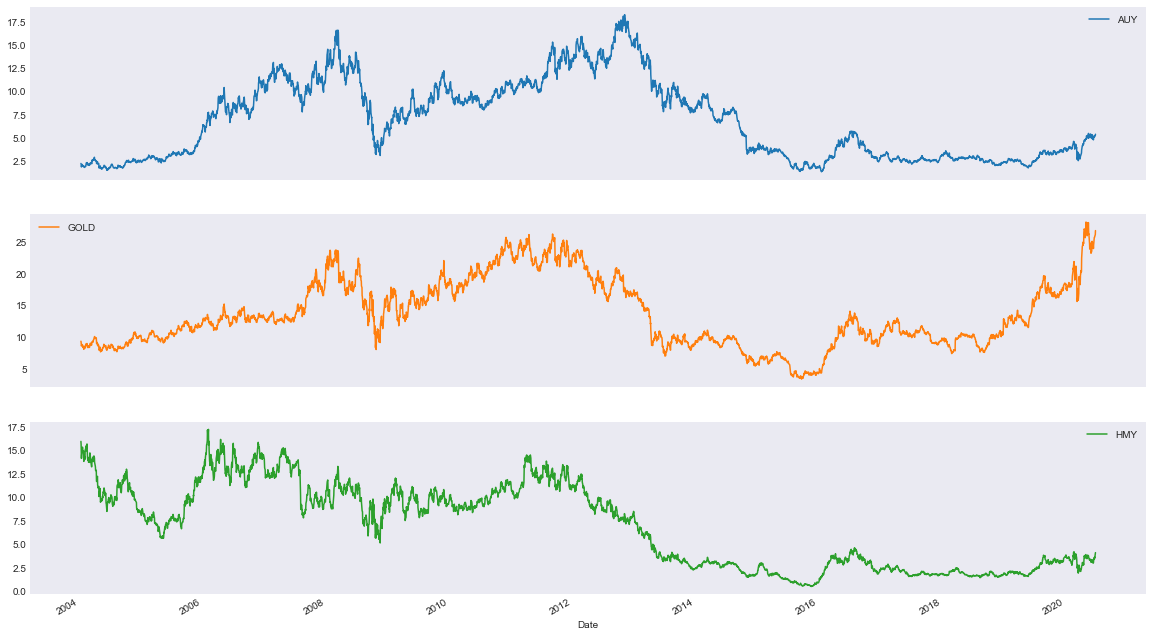

In [140]:
Gold_Miners.plot(subplots=True, figsize=(20,12))

plt.show()


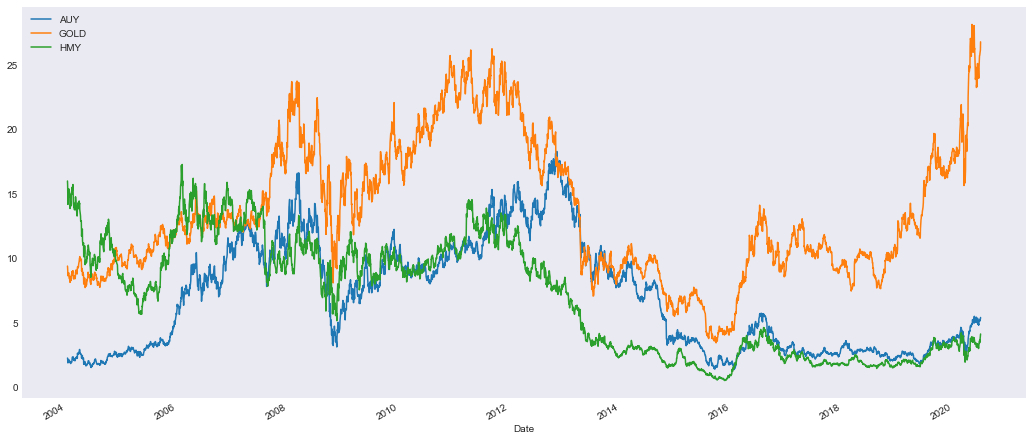

In [141]:
Gold_Miners.plot(subplots=False, figsize=(18,8))

plt.show()


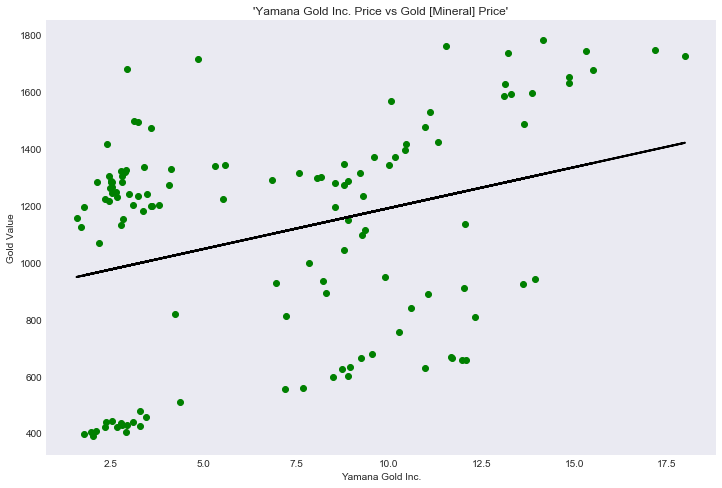

In [212]:

#Yamana Gold Inc. Scatter

fig, ax = plt.subplots(figsize=(12,8))

X = Gold_Full["AUY"]
Y = Gold_Full['Price']      #this is Gold Price as a commoditie
ax.scatter(X, Y, color="g")
ax.plot(X, LinearRegression(X,Y), color="black", lw=2)
ax.set_xlabel("Yamana Gold Inc.")
ax.set_ylabel("Gold Value")
ax.set_title("'Yamana Gold Inc. Price vs Gold [Mineral] Price'")
plt.show()

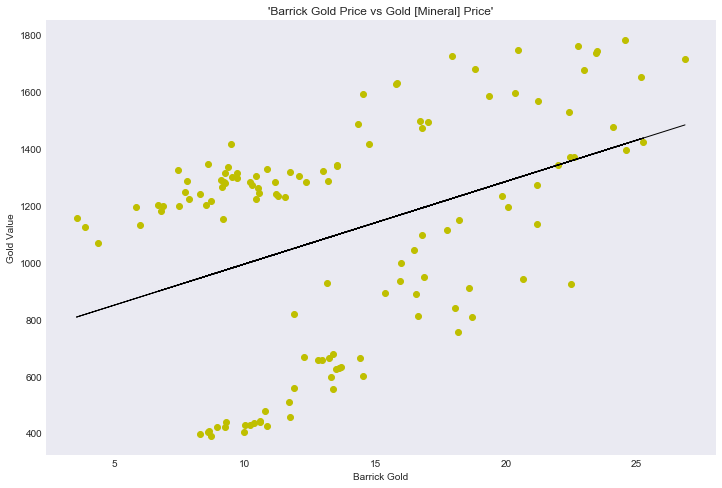

In [213]:
#Barrick Gold Scatter 


fig, ax = plt.subplots(figsize=(12,8))

X = Gold_Full["GOLD"]
Y = Gold_Full['Price']      #this is Gold Price as a commoditie
 

ax.scatter(X, Y, color="y")
ax.plot(X, LinearRegression(X,Y), color="black", lw=1)
ax.set_xlabel("Barrick Gold")
ax.set_ylabel("Gold Value")
ax.set_title("'Barrick Gold Price vs Gold [Mineral] Price'")
plt.show()

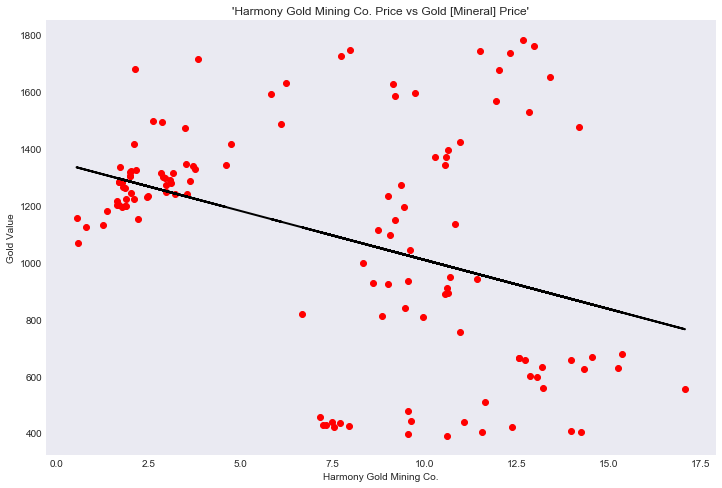

In [210]:
#Harmony Gold Mining Co. Scatter

fig, ax = plt.subplots(figsize=(12,8))

X = Gold_Full["HMY"]
Y = Gold_Full['Price']      #this is Gold Price as a commoditie
ax.scatter(X, Y, color="r")
ax.plot(X, LinearRegression(X,Y), color="black", lw=2)
ax.set_xlabel("Harmony Gold Mining Co.")
ax.set_ylabel("Gold Value")
ax.set_title("'Harmony Gold Mining Co. Price vs Gold [Mineral] Price'")
plt.show()

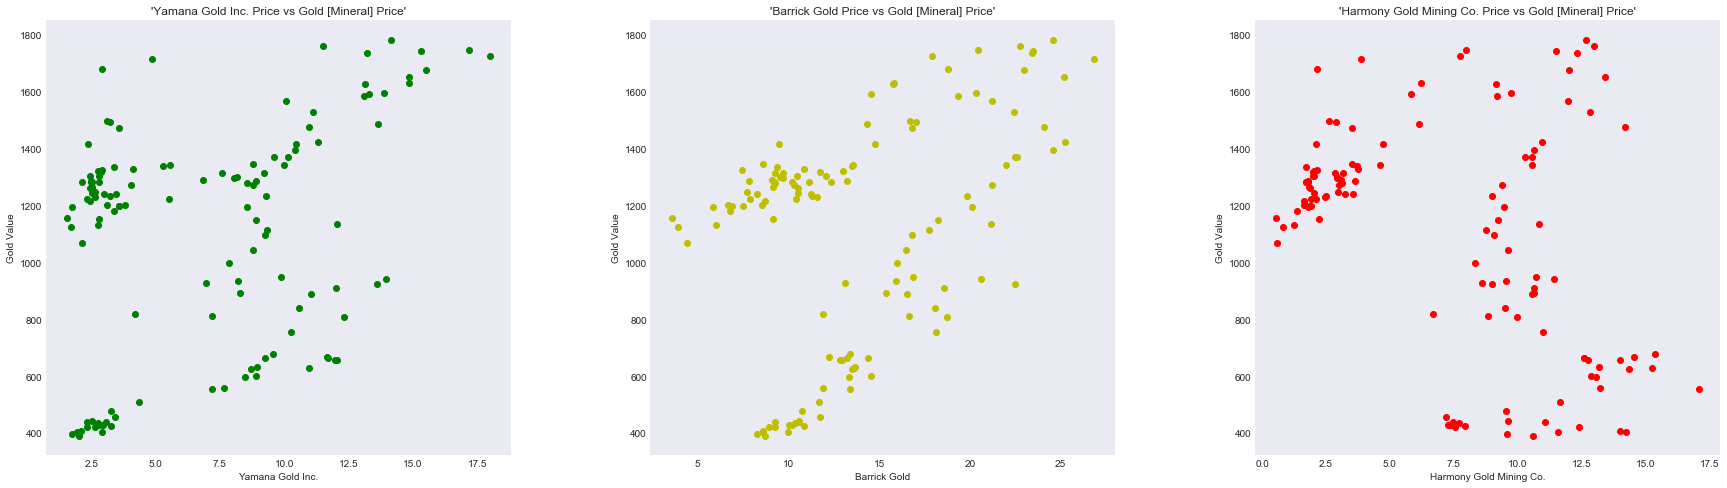

In [209]:
fig, ax = plt.subplots(figsize=(30,8), nrows=1, ncols=3)

ax[0].scatter(Gold_Full["AUY"],Gold_Full['Price'], color="g")
ax[0].set_xlabel("Yamana Gold Inc.")
ax[0].set_ylabel("Gold Value")
ax[0].set_title("'Yamana Gold Inc. Price vs Gold [Mineral] Price'")

ax[1].scatter(Gold_Full["GOLD"], Gold_Full['Price'], color="y")
ax[1].set_xlabel("Barrick Gold")
ax[1].set_ylabel("Gold Value")
ax[1].set_title("'Barrick Gold Price vs Gold [Mineral] Price'")

ax[2].scatter(Gold_Full["HMY"], Gold_Full['Price'] , color="r")
ax[2].set_xlabel("Harmony Gold Mining Co.")
ax[2].set_ylabel("Gold Value")
ax[2].set_title("'Harmony Gold Mining Co. Price vs Gold [Mineral] Price'")

fig.subplots_adjust(wspace=0.3)
plt.show()



In [54]:
Gold_clean = Gold_Full



In [51]:
del Gold_clean["Date"]


In [52]:
Gold_clean.head()

,Price,AUY,GOLD,HMY
0,405.976,2.104692,8.622911,13.985991
1,404.850,2.914188,9.990829,14.240525
2,391.780,2.019482,8.703142,10.602301
3,398.441,1.763851,8.283249,9.564120
4,405.402,1.951314,8.588621,11.563664


In [63]:
Gold_corr = Gold_clean.corr()
Gold_corr

,Price,AUY,GOLD,HMY
Price,1.000000,0.315502,0.396285,-0.394878
AUY,0.315502,1.000000,0.700830,0.576516
GOLD,0.396285,0.700830,1.000000,0.529948
HMY,-0.394878,0.576516,0.529948,1.000000


# GDP [China, USA, Brazil]

In [142]:
GDP = pd.read_csv("gdp_csv.csv", sep=",")
GDP.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [143]:
filtro_USA = GDP["Country Code"].str.contains("USA")
filtro_BRAZ = GDP["Country Code"].str.contains("BRA")
filtro_CHN = GDP["Country Code"].str.contains("CHN")
GDP_USA = GDP[filtro_USA]
GDP_BRA = GDP[filtro_BRAZ]
GDP_CHN = GDP[filtro_CHN]


In [149]:
GDP_USA.head()

,Country Name,Country Code,Year,Value
11029,United States,USA,1960,5.433000e+11
11030,United States,USA,1961,5.633000e+11
11031,United States,USA,1962,6.051000e+11
11032,United States,USA,1963,6.386000e+11
11033,United States,USA,1964,6.858000e+11


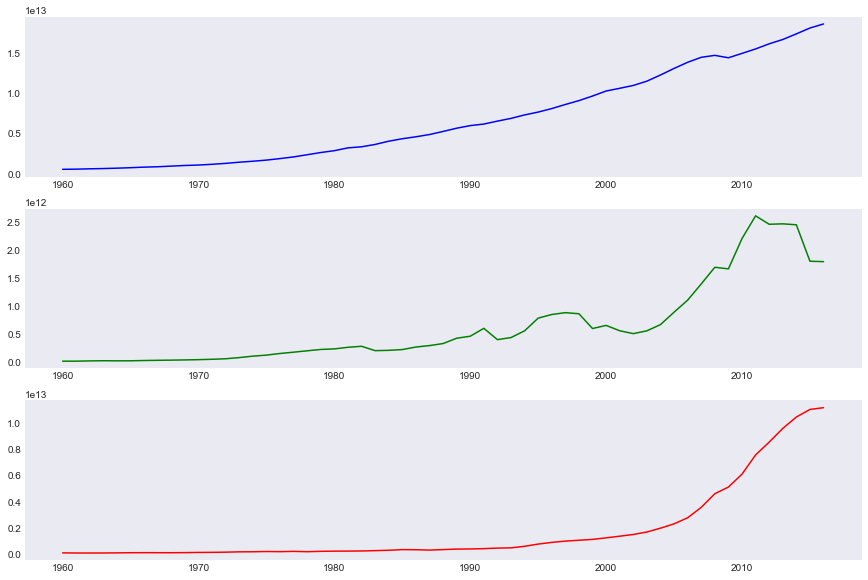

In [159]:
#GDP Evolution of USA, Brazil & China

fig, ax = plt.subplots(3, figsize=(15,10))

ax[0].plot(GDP_USA["Year"],GDP_USA["Value"], c="b")
ax[1].plot(GDP_BRA["Year"],GDP_BRA["Value"], c="g")
ax[2].plot(GDP_CHN["Year"],GDP_CHN["Value"], c="r")


# GDP Evolution [USA & China]

In [185]:
GDP_USAF = GDP_USA[["Value", "Year"]]
GDP_CHNF = GDP_CHN[["Value", "Year"]]
GDP_FULL = GDP_USAF.merge(GDP_CHNF, on="Year", how="inner")
GDP_FULL.columns = ["GDP USA", "Year", "GDP China"]
GDP_FULL.set_index("Year")

,GDP USA,GDP China
Year,,
1960,5.433000e+11,5.971647e+10
1961,5.633000e+11,5.005687e+10
1962,6.051000e+11,4.720936e+10
1963,6.386000e+11,5.070680e+10
1964,6.858000e+11,5.970834e+10
1965,7.437000e+11,7.043627e+10
1966,8.150000e+11,7.672029e+10
1967,8.617000e+11,7.288163e+10
1968,9.425000e+11,7.084654e+10


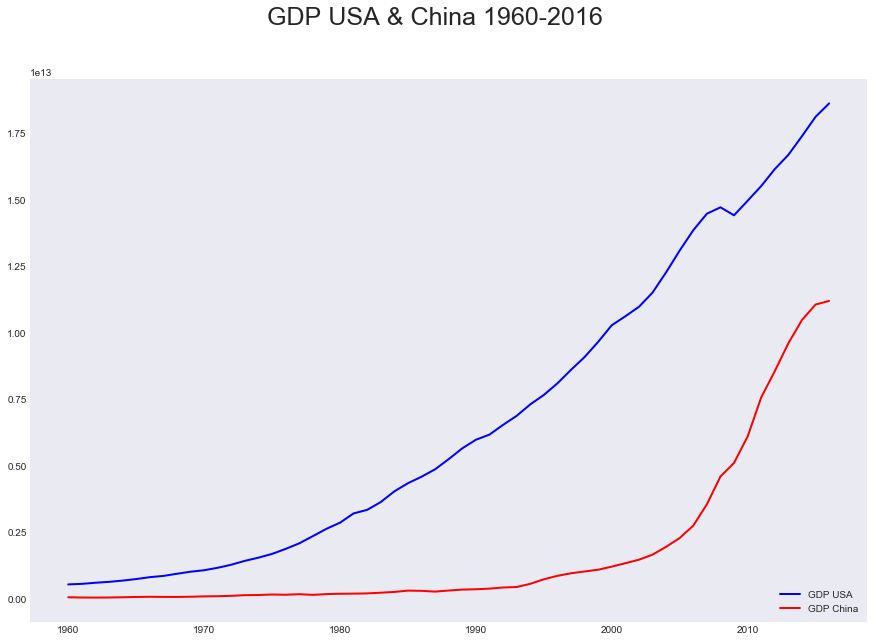

In [194]:
plt.figure(figsize = (15,10)).suptitle("GDP USA & China 1960-2016", size=25)
f1 = plt.plot(GDP_FULL["Year"], GDP_FULL["GDP USA"], lw=2, color="b")
f2 = plt.plot(GDP_FULL["Year"], GDP_FULL["GDP China"], lw=2, color="r")
plt.legend(["GDP USA", "GDP China"], loc="lower right")


In [234]:
GDP_FULL_ChinaUsa = GDP_FULL[["GDP USA", "GDP China"]]
GDP_FULL_ChinaUsa.corr()


,GDP USA,GDP China
GDP USA,1.000000,0.847095
GDP China,0.847095,1.000000


In [204]:
Gold_Annual = gold_y[["year","Price"]] 
Gold_Annual.columns=["Year", " Gold Price"]
Gold_Annual

,Year,Gold Price
0,1950,34.720
1,1951,34.660
2,1952,34.790
3,1953,34.850
4,1954,35.040
...,...,...
65,2015,1068.317
66,2016,1152.165
67,2017,1265.674
68,2018,1249.887


In [222]:
GDP_GOLD = GDP_FULL.merge(Gold_Annual, on="Year", how="inner")
GDP_GOLD.columns = ['GDP USA', 'Year', 'GDP China', 'Gold Price']

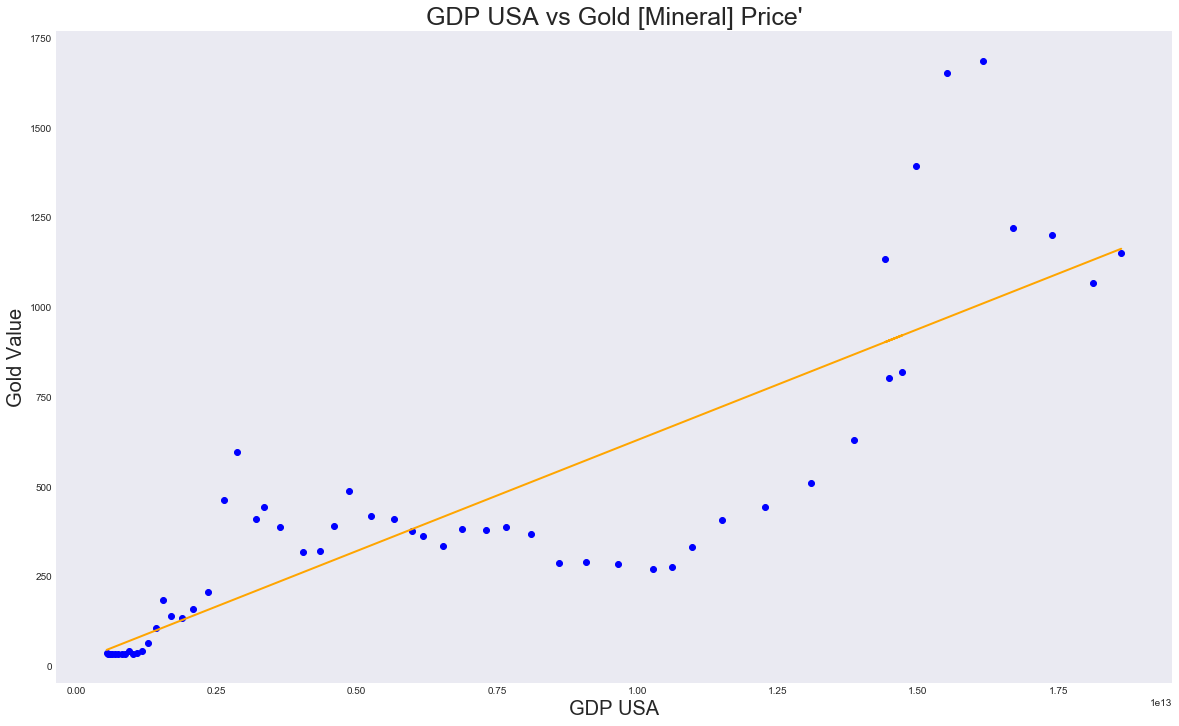

In [237]:
fig, ax = plt.subplots(figsize=(20,12))

X = GDP_GOLD["GDP USA"]
Y = GDP_GOLD['Gold Price']      #this is Gold Price as a commoditie
 

ax.scatter(X, Y, color="b")
ax.plot(X, LinearRegression(X,Y), color="orange", lw=2)
ax.set_xlabel("GDP USA",size=20)
ax.set_ylabel("Gold Value",size=20)
ax.set_title("GDP USA vs Gold [Mineral] Price'", size=25)
plt.show()

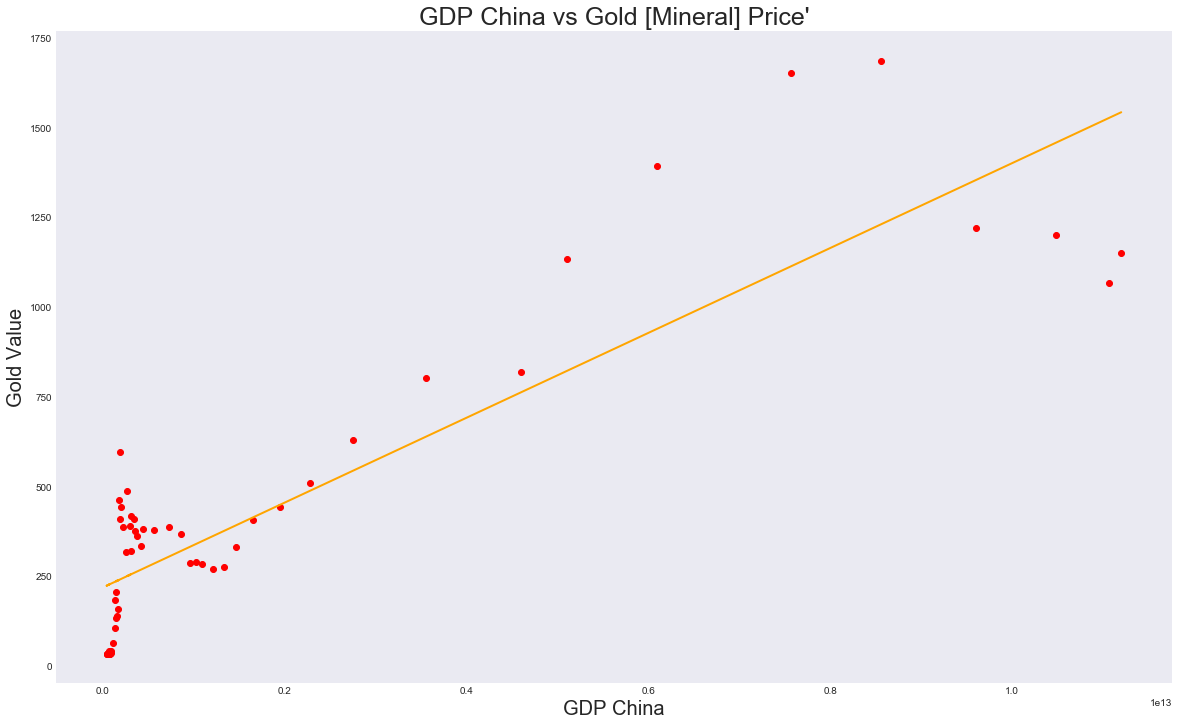

In [238]:
fig, ax = plt.subplots(figsize=(20,12))

X = GDP_GOLD["GDP China"]
Y = GDP_GOLD['Gold Price']      #this is Gold Price as a commoditie
 

ax.scatter(X, Y, color="r")
ax.plot(X, LinearRegression(X,Y), color="orange", lw=2)
ax.set_xlabel("GDP China", size=20)
ax.set_ylabel("Gold Value", size=20)
ax.set_title("GDP China vs Gold [Mineral] Price'", size=25)
plt.show()

In [241]:
GDP_GOLD_clean=GDP_GOLD[["GDP USA", "GDP China", "Gold Price"]]
GDP_GOLD_clean.corr()

,GDP USA,GDP China,Gold Price
GDP USA,1.000000,0.847095,0.844059
GDP China,0.847095,1.000000,0.873629
Gold Price,0.844059,0.873629,1.000000
